In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tensorflow.keras.utils import plot_model
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import LabelBinarizer

In [15]:
def plot_metrics(title,history,axes,ymin=0,ymax=1):
    axes.plot(history['loss'])
    axes.set_xlabel('épocas')  
    axes.set_ylabel('loss')
    axes.set_title(title, fontsize=20)
    axes.set_ylim(ymin=ymin,ymax=ymax)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))

def get_model(neurons_layer,activation_ocultas,activation_salida):
    np.random.seed(5)
    tf.random.set_seed(5)


    model=Sequential()
    for index,neurons in enumerate(neurons_layer):
        if (index==0):
            model.add(Dense(neurons, activation=activation_ocultas,input_dim=x.shape[1]))
        elif index==(len(neurons_layer)-1):
            model.add(Dense(neurons, activation=activation_salida))
        else:
            model.add(Dense(neurons, activation=activation_ocultas))
    model.compile(loss='mean_squared_error')

    return model

    
activations=[
        ("Sigmoid","sigmoid"),
        ("Tan Hiperbolica","tanh"),
        ("ReLU","relu"),
        ("Leaky ReLU",tf.keras.layers.LeakyReLU()),
        ("ELU","elu"),
        ("SeLU","selu"),
        ("GeLU","gelu"),        
        ("Swish","swish")]

def plot_all(historys,ymin,ymax):
    figure=plt.figure(figsize=(25,20))
    for index,(history,name) in enumerate(historys):
        axes = figure.add_subplot(3,3,index+1)
        plot_metrics(name,history,axes,ymin,ymax)

In [11]:
from sklearn.datasets import load_diabetes
datos=load_diabetes()
x=datos.data
y=datos.target


neurons_layer=[8,16,32,64,32,16,8,1]
historys=[]

for index,(name,activation) in enumerate(activations):
        model=get_model(neurons_layer,activation,"linear")
        history=model.fit(x, y,epochs=50,verbose=False)
        historys.append((history.history,name))


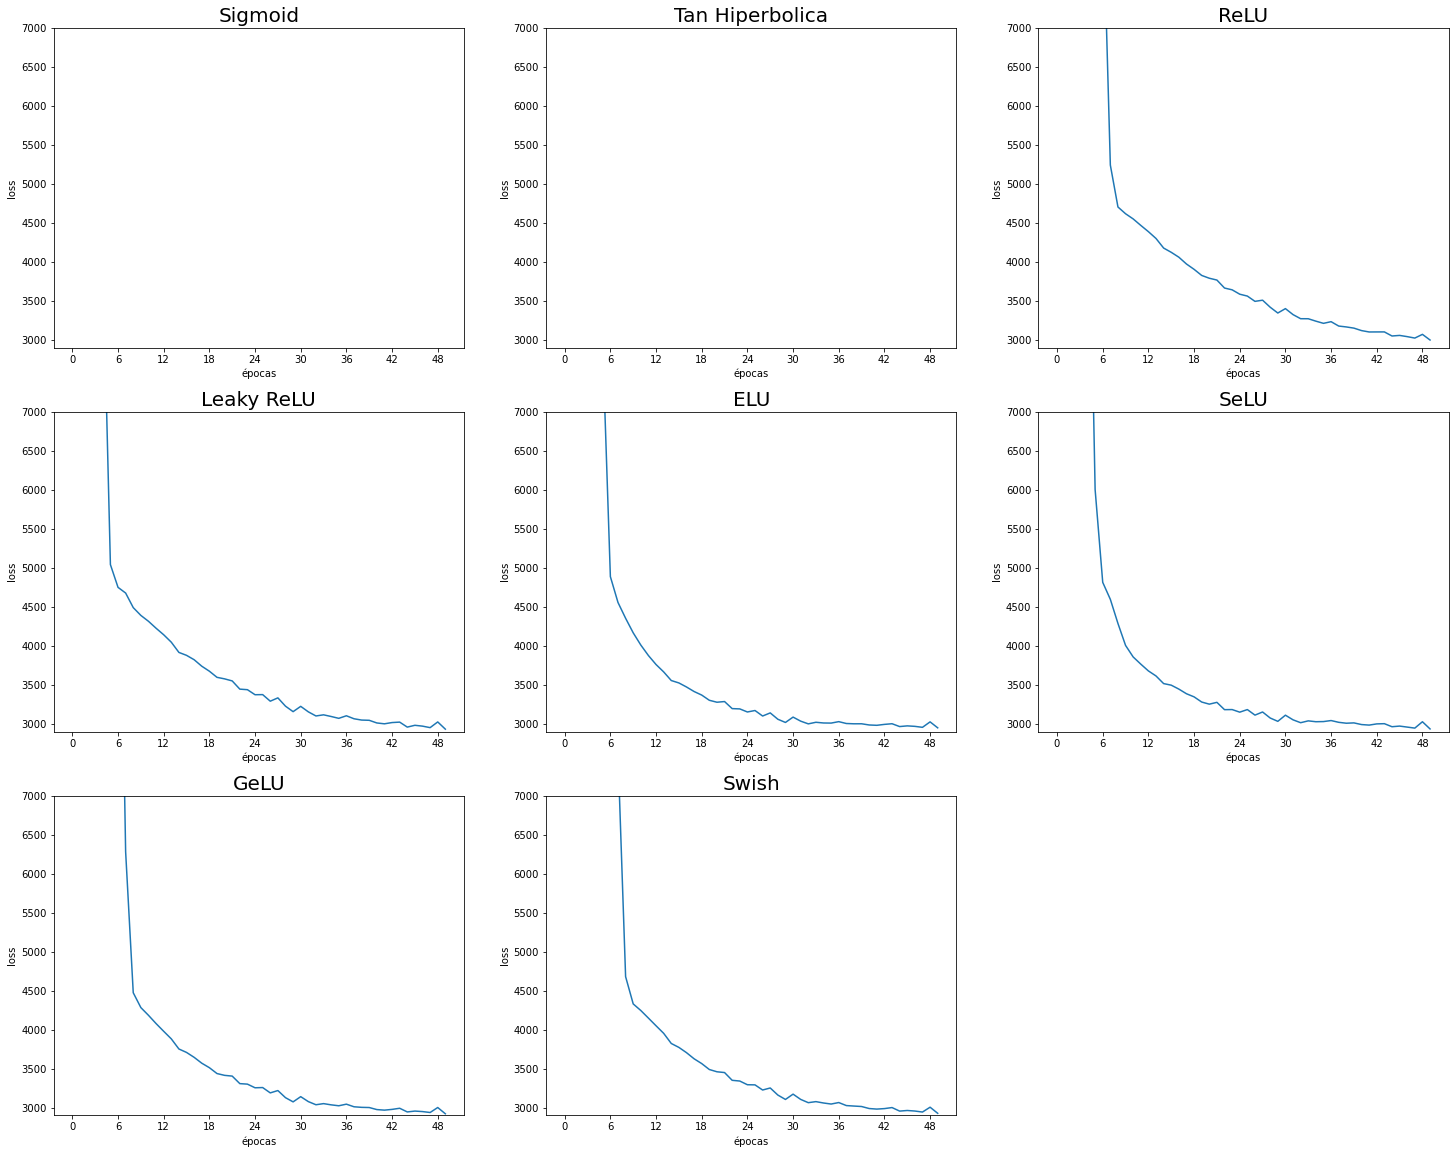

In [16]:
plot_all(historys,2900,7000)

In [21]:
from sklearn.datasets import load_digits
datos=load_digits()
x=datos.data
y=datos.target
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(y)+1))
y = label_binarizer.transform(y)

neurons_layer=[8,16,32,64,32,16,10]
historys=[]

for index,(name,activation) in enumerate(activations):
        model=get_model(neurons_layer,activation,"softmax")
        history=model.fit(x, y,epochs=50,verbose=False)
        historys.append((history.history,name))

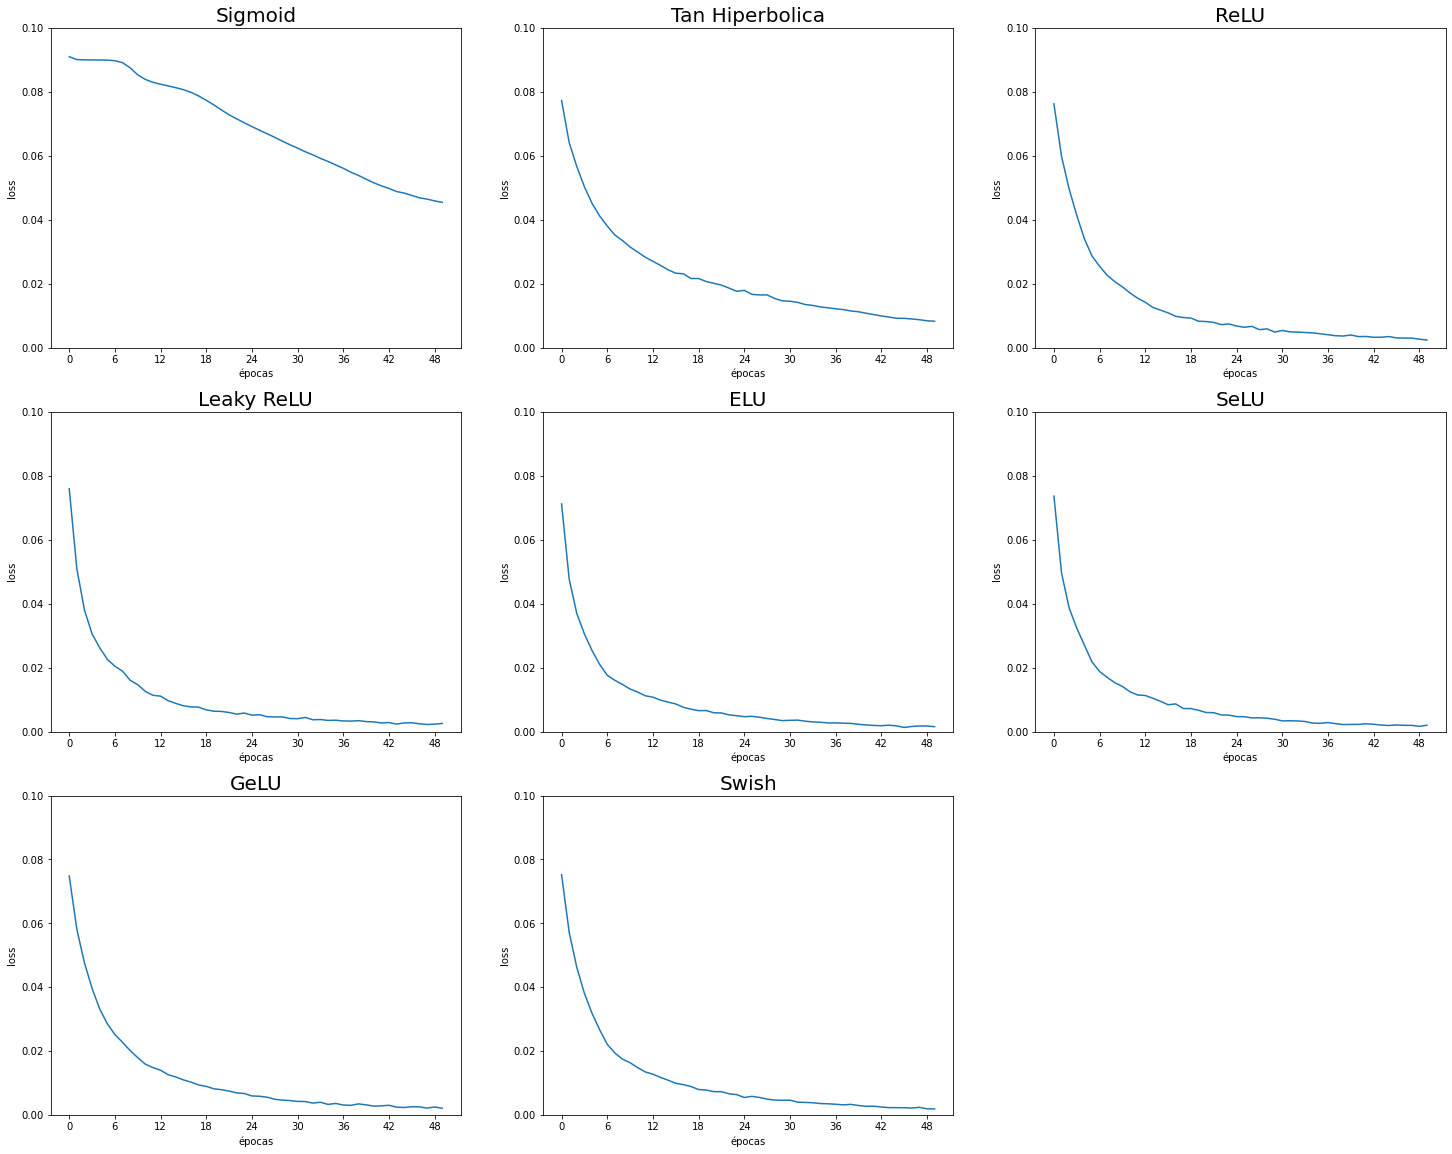

In [30]:
plot_all(historys,0,0.1)

In [47]:
from sklearn.datasets import load_wine
datos=load_wine()
x=datos.data
y=datos.target
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(y)+1))
y = label_binarizer.transform(y)

neurons_layer=[8,16,32,64,32,16,8,3]
historys=[]

for index,(name,activation) in enumerate(activations):
        model=get_model(neurons_layer,activation,"softmax")
        history=model.fit(x, y,epochs=50,verbose=False)
        historys.append((history.history,name))


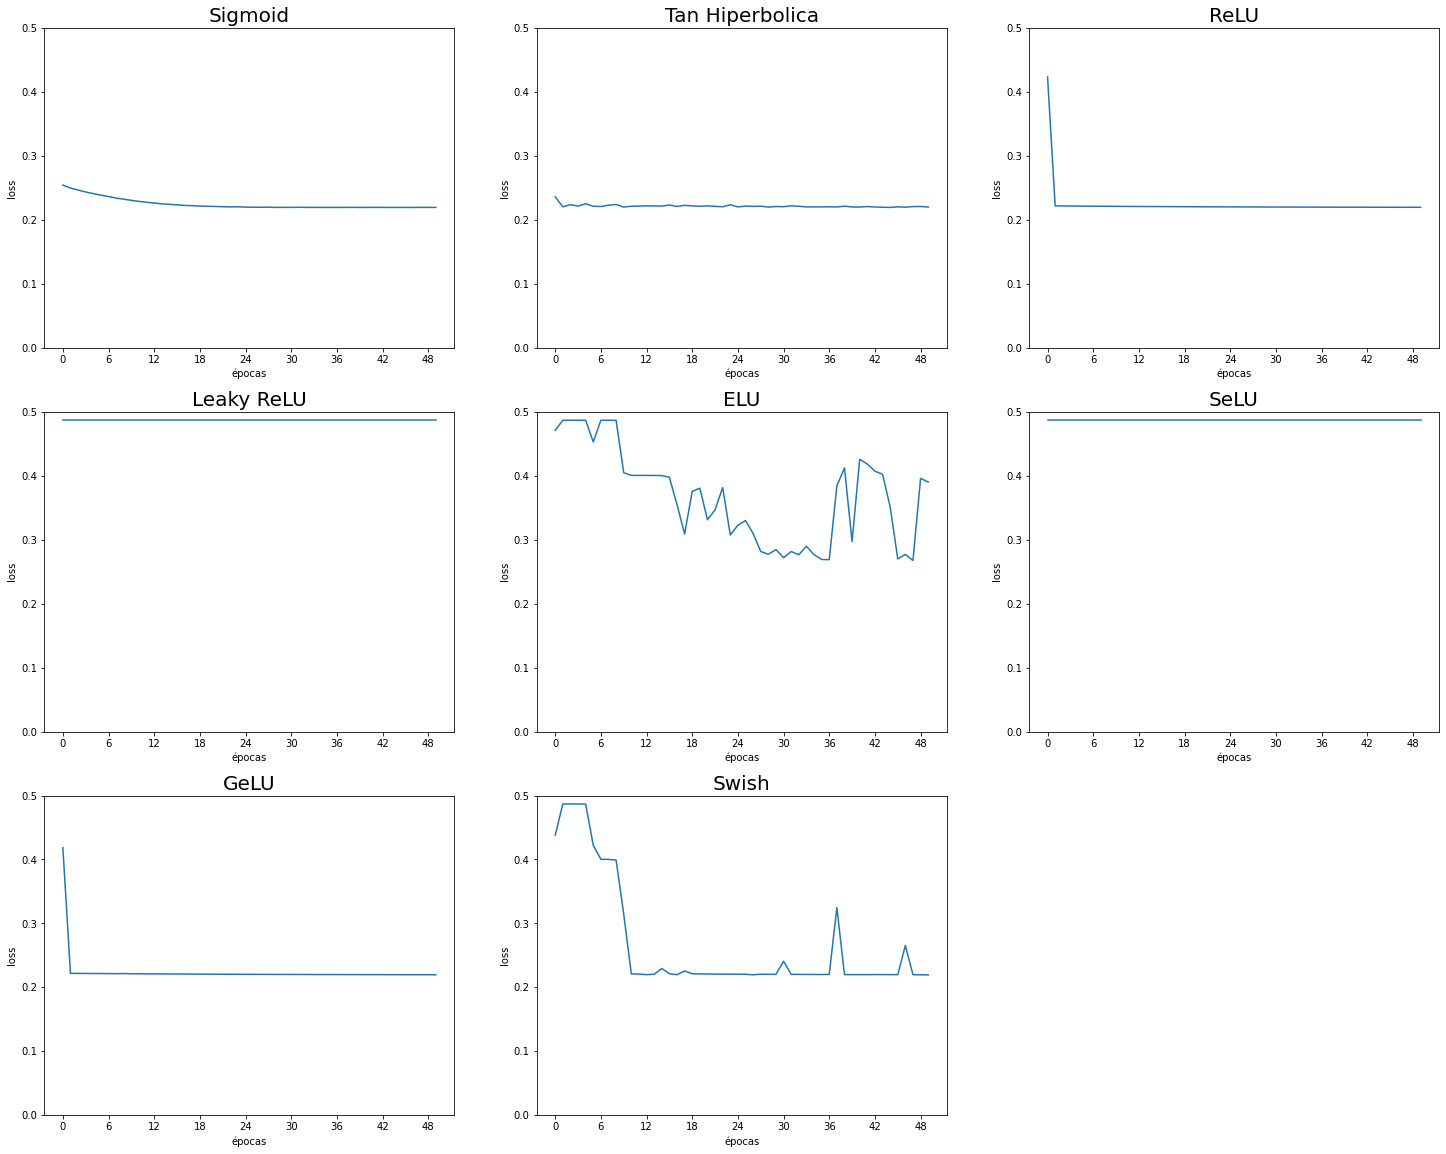

In [48]:
plot_all(historys,0,0.5)